**Бизнес-задача:** понять какие треки надо записывать, когда их запускать, чтобы они получили максимальную популярность.


**Описание данных:**

- track_id - Числовой (int) - Уникальный ID трека (самый важный идентификатор).
- album_comments  - Числовой (float) - Количество комментариев (уровень трека/альбома).
- album_created_date   - Временной (str) - Дата добавления на платформу.
- album_release_date - Временной (str) - Дата релиза трека или альбома..
- album_favorites - Числовой (float) - Количество добавлений в избранное.
- album_listens - Числовой (float) - Общее количество прослушиваний (ключевая метрика популярности)
- album_tags - Текстовый (str) - Пользовательские теги.
- album_title - Категориальный (str) - Название альбома.
- album_track_count - Числовой (float) - Количество треков в альбоме.
- album_type - Категориальный (str) - Тип (например, альбом или сингл).
- artist_active_start - Категориальный (str) - Год начала активности артиста.
- artist_active_end - Категориальный (str) - Год окончания активности артиста.
- artist_latitude - Числовой (float) - Географическая широта местоположения артиста.
- artist_longitude - Числовой (float) - Географическая долгота местоположения артиста.
- artist_location - Категориальный (str) - Название местоположения артиста.
- artist_name - Категориальный (str) - Имя артиста или группы.
- duration - Числовой (float) - Длительность трека в секундах.
- track_genre_top - Категориальный (str) - Основной (топовый) жанр трека (ключевая категория).
- track_genres_all - Текстовый (str) - Полный список жанров с иерархией.
- track_interest - Числовой (float) - Метрика интереса или вовлечённости.
- language_code - Категориальный (str) - Код языка (en, fr, es и т.д.).
- track_number - Числовой (float) - Номер трека в альбоме.




In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re

In [6]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ГП-3/Попытка2/tracks.csv', header=1, encoding='utf-8')

/tmp/ipython-input-2225377491.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ГП-3/Попытка2/tracks.csv', header=1, encoding='utf-8')


# Обработка данных

In [7]:
df = df.rename(columns={'Unnamed: 0': 'track_id'})
df.drop(0, inplace=True)

#Удаляем ненужные столбцы
columns_to_drop = [
    'id', 'id.1',
    'comments.1', 'comments.2',
    'date_created.1', 'date_created.2',
    'favorites.1', 'favorites.2',
    'tags.1', 'tags.2',
    'title.1',
    'information.1',
    'listens.1',
    'split', 'subset',
    'bio', 'wikipedia_page', 'website',
    'related_projects', 'members',
    'information'
    'engineer', 'bit_rate', 'composer', 'date_recorded', 'genres',
    'license', 'lyricist', 'publisher', 'related_projects', 'producer', 'associated_labels'
]


existing_columns = [col for col in columns_to_drop if col in df.columns]
df.drop(columns=existing_columns, inplace=True)

rename_dict = {
    'comments': 'album_comments',
    'favorites': 'album_favorites',
    'listens': 'album_listens',  # или total_listens
    'tags': 'album_tags',
    'title': 'album_title',
    'tracks': 'album_track_count',
    'type': 'album_type',
    'location': 'artist_location',
    'name': 'artist_name',
    'active_year_begin': 'artist_active_start',
    'active_year_end': 'artist_active_end',
    'latitude': 'artist_latitude',
    'longitude': 'artist_longitude',
    'genre_top': 'track_genre_top',
    'genres_all': 'track_genres_all',
    'interest': 'track_interest',
    'number': 'track_number',
    'date_released': 'album_release_date',
    'date_created': 'album_created_date'
}

df.rename(columns=rename_dict, inplace=True)


date_columns = ['album_release_date', 'album_created_date', 'track_recorded_date']
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

df['album_release_month'] = df['album_release_date'].dt.month
df['album_release_year'] = df['album_release_date'].dt.year


int_cols = ['album_comments', 'album_favorites', 'album_listens',
            'album_track_count', 'track_interest', 'track_number']
for col in int_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype('int64')


In [8]:
del df['engineer']

In [9]:
df

,track_id,album_comments,album_created_date,album_release_date,album_favorites,information,album_listens,album_tags,album_title,album_track_count,...,artist_longitude,artist_name,duration,track_genre_top,track_genres_all,track_interest,language_code,track_number,album_release_month,album_release_year
1,2,0,2008-11-26 01:44:45,2009-01-05,4,<p></p>,6073,[],AWOL - A Way Of Life,7,...,-74.405661,AWOL,168.0,Hip-Hop,[21],4656,en,3,1.0,2009.0
2,3,0,2008-11-26 01:44:45,2009-01-05,4,<p></p>,6073,[],AWOL - A Way Of Life,7,...,-74.405661,AWOL,237.0,Hip-Hop,[21],1470,en,4,1.0,2009.0
3,5,0,2008-11-26 01:44:45,2009-01-05,4,<p></p>,6073,[],AWOL - A Way Of Life,7,...,-74.405661,AWOL,206.0,Hip-Hop,[21],1933,en,6,1.0,2009.0
4,10,0,2008-11-26 01:45:08,2008-02-06,4,NaN,47632,[],Constant Hitmaker,2,...,NaN,Kurt Vile,161.0,Pop,[10],54881,en,1,2.0,2008.0
5,20,0,2008-11-26 01:45:05,2009-01-06,2,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,[],Niris,13,...,0.891874,Nicky Cook,311.0,NaN,"[17, 10, 76, 103]",978,en,3,1.0,2009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106570,155316,0,2017-03-30 15:20:35,2017-02-17,0,"<p>A live performance at Monty Hall on Feb 17,...",1506,[],"Live at Monty Hall, 2/17/2017",6,...,NaN,Spowder,162.0,Rock,"[25, 12]",122,NaN,3,2.0,2017.0
106571,155317,0,2017-03-30 15:20:35,2017-02-17,0,"<p>A live performance at Monty Hall on Feb 17,...",1506,[],"Live at Monty Hall, 2/17/2017",6,...,NaN,Spowder,217.0,Rock,"[25, 12]",194,NaN,4,2.0,2017.0
106572,155318,0,2017-03-30 15:20:35,2017-02-17,0,"<p>A live performance at Monty Hall on Feb 17,...",1506,[],"Live at Monty Hall, 2/17/2017",6,...,NaN,Spowder,404.0,Rock,"[25, 12]",214,NaN,6,2.0,2017.0
106573,155319,0,2017-03-30 15:20:35,2017-02-17,0,"<p>A live performance at Monty Hall on Feb 17,...",1506,[],"Live at Monty Hall, 2/17/2017",6,...,NaN,Spowder,146.0,Rock,"[25, 12]",336,NaN,5,2.0,2017.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 1 to 106574
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   track_id             106574 non-null  object        
 1   album_comments       106574 non-null  int64         
 2   album_created_date   103045 non-null  datetime64[ns]
 3   album_release_date   70294 non-null   datetime64[ns]
 4   album_favorites      106574 non-null  int64         
 5   information          83149 non-null   object        
 6   album_listens        106574 non-null  int64         
 7   album_tags           106574 non-null  object        
 8   album_title          105549 non-null  object        
 9   album_track_count    106574 non-null  int64         
 10  album_type           100066 non-null  object        
 11  artist_active_start  22711 non-null   object        
 12  artist_active_end    5375 non-null    object        
 13  artist_latitud

Добавим столбик, отвечающий за то, сколько лет артист ведет активную деятельность




In [13]:
def extract_year_from_string(text):
    if pd.isna(text):
        return None

    text = str(text).strip()
    match = re.search(r'\b(19|20)\d{2}\b', text)
    return int(match.group()) if match else None

In [15]:
def calculate_years_active_simple(df, current_year=2025):
    years_active_list = []

    for idx, row in df.iterrows():
        start_year = extract_year_from_string(row.get('artist_active_start'))
        end_year = extract_year_from_string(row.get('artist_active_end'))

        # Если есть оба года
        if start_year and end_year:
            years = max(1, end_year - start_year)
            years_active_list.append(years)
            continue

        # Если есть только начало
        if start_year and not end_year:
            end_text = str(row.get('artist_active_end', '')).lower()
            if any(word in end_text for word in ['present', 'current', 'now', 'active', '至今', '現在']):
                end_year = current_year
            else:
                end_year = current_year

            years = max(1, end_year - start_year)
            years_active_list.append(years)
            continue

        # Если есть только конец (редкий случай)
        if not start_year and end_year:
            # Предполагаем, что артист работал 10 лет до указанной даты
            start_year = end_year - 10
            years = max(1, end_year - start_year)
            years_active_list.append(years)
            continue

        # Если данных нет
        years_active_list.append(np.nan)

    result = pd.Series(years_active_list, index=df.index, name='years_active')

    print(f"Рассчитано years_active для {result.notna().sum()} записей ({result.notna().sum()/len(df)*100}%)")

    return result

# Использование
df['years_active'] = calculate_years_active_simple(df)

Рассчитано years_active для 22758 записей (21.35417644078293%)


Маленький процент данных, у которых есть информация про года активности артиста, но несмотря на это, 22 000 записей позволит делать адекватный анализ.

# Разведочный анализ

## Анализ целевой переменной

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


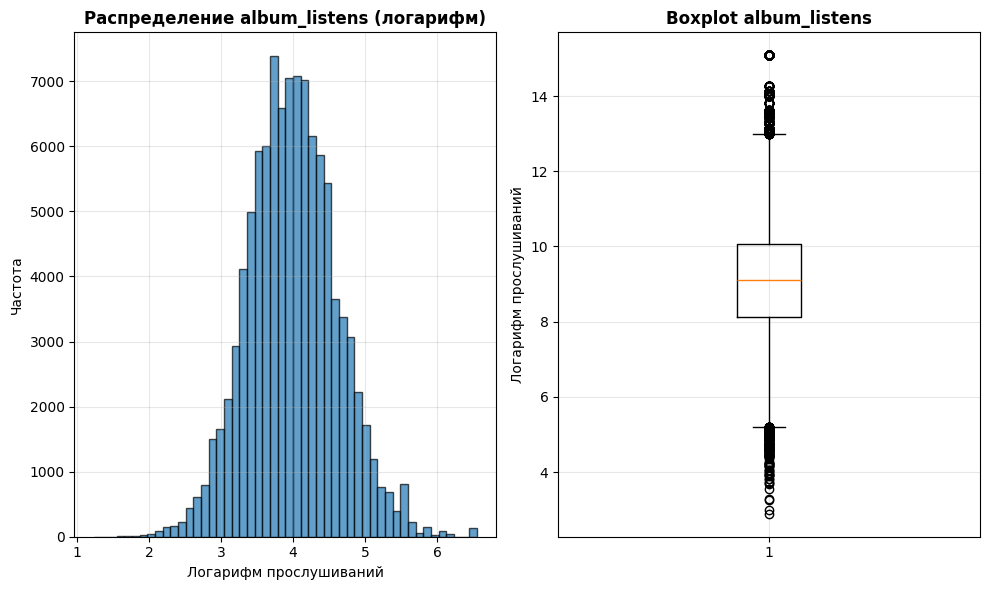

In [16]:
plt.figure(figsize=(10,6))

plt.subplot(1, 2, 1)
plt.hist(np.log10(df['album_listens']), bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Логарифм прослушиваний')
plt.ylabel('Частота')
plt.title('Распределение album_listens (логарифм)', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(np.log1p(df['album_listens']))
plt.ylabel('Логарифм прослушиваний')
#plt.xticks('Прослушивания')
plt.title('Boxplot album_listens', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

На первом графике видно, что распределение треков нормальное, что хорошо.
На втором графике наблюдаем большое кол-во выбросов, которые необходимо обработать

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


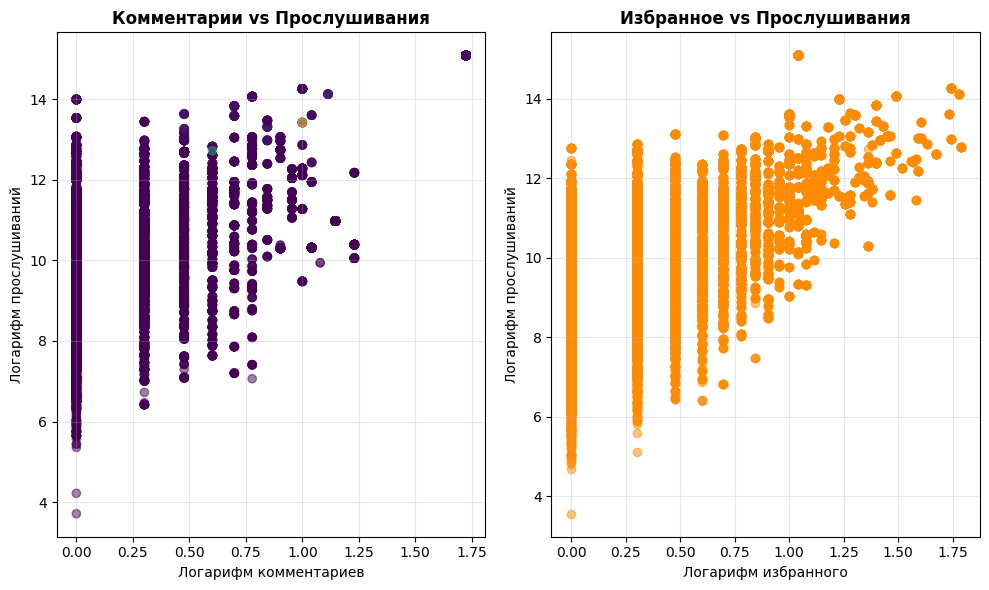

In [34]:
plt.figure(figsize=(10,6))

#Популярность vs Количество комментариев
plt.subplot(1, 2, 1)
plt.scatter(np.log10(df['album_comments']), np.log1p(df['album_listens']),
            alpha=0.5, c=df['track_interest'], cmap='viridis')
plt.xlabel('Логарифм комментариев')
plt.ylabel('Логарифм прослушиваний')
plt.title('Комментарии vs Прослушивания', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

# Популярность vs Избранное
plt.subplot(1, 2, 2)
plt.scatter(np.log10(df['album_favorites']), np.log1p(df['album_listens']),
            alpha=0.5, color='darkorange')
plt.xlabel('Логарифм избранного')
plt.ylabel('Логарифм прослушиваний')
plt.title('Избранное vs Прослушивания', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

Данные графики показывают, что нет никакой зависимости между комментариями и добавлением в избранное и количества прослушиваний. Это может быть связано с тем, что в приложениях появляется "Моя волна", по которой могут крутится одни и те же песни, но не быть в избранных у пользователя.

## Распределение типов альбомов

album_type
Album               87549
Radio Program        6551
Live Performance     5035
Single Tracks         917
Contest                14
Name: count, dtype: int64


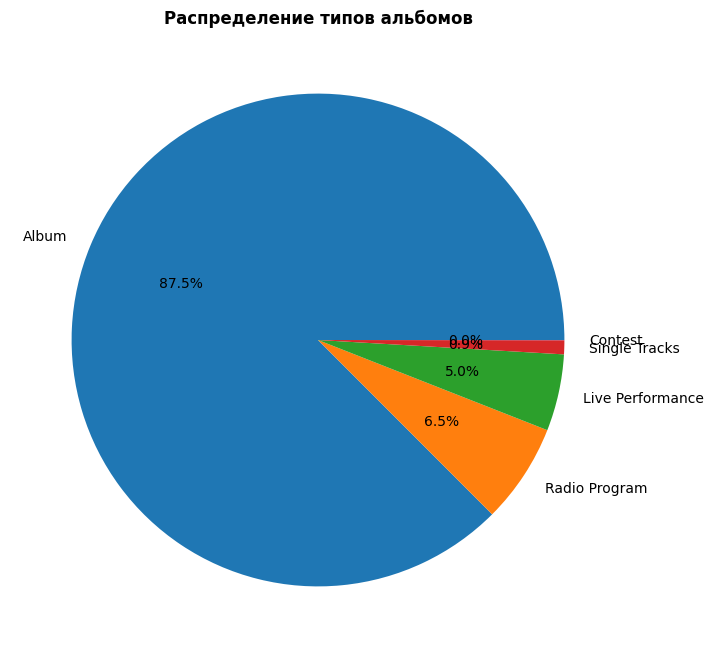

In [91]:
# Распределение по типам альбомов
plt.figure(figsize=(10,8))
album_type_counts = df['album_type'].value_counts()
print(album_type_counts)
plt.pie(album_type_counts.values, labels=album_type_counts.index, autopct='%1.1f%%')
plt.title('Распределение типов альбомов', fontweight='bold')
plt.show()

По графику понятно, что больше всего среди наших данных представлено именно полноценных альбомов. Это делает наш анализ более узким направленым, что позволит получить более точные результаты и выводы.

## Анализ параметров, связанных с популярностью

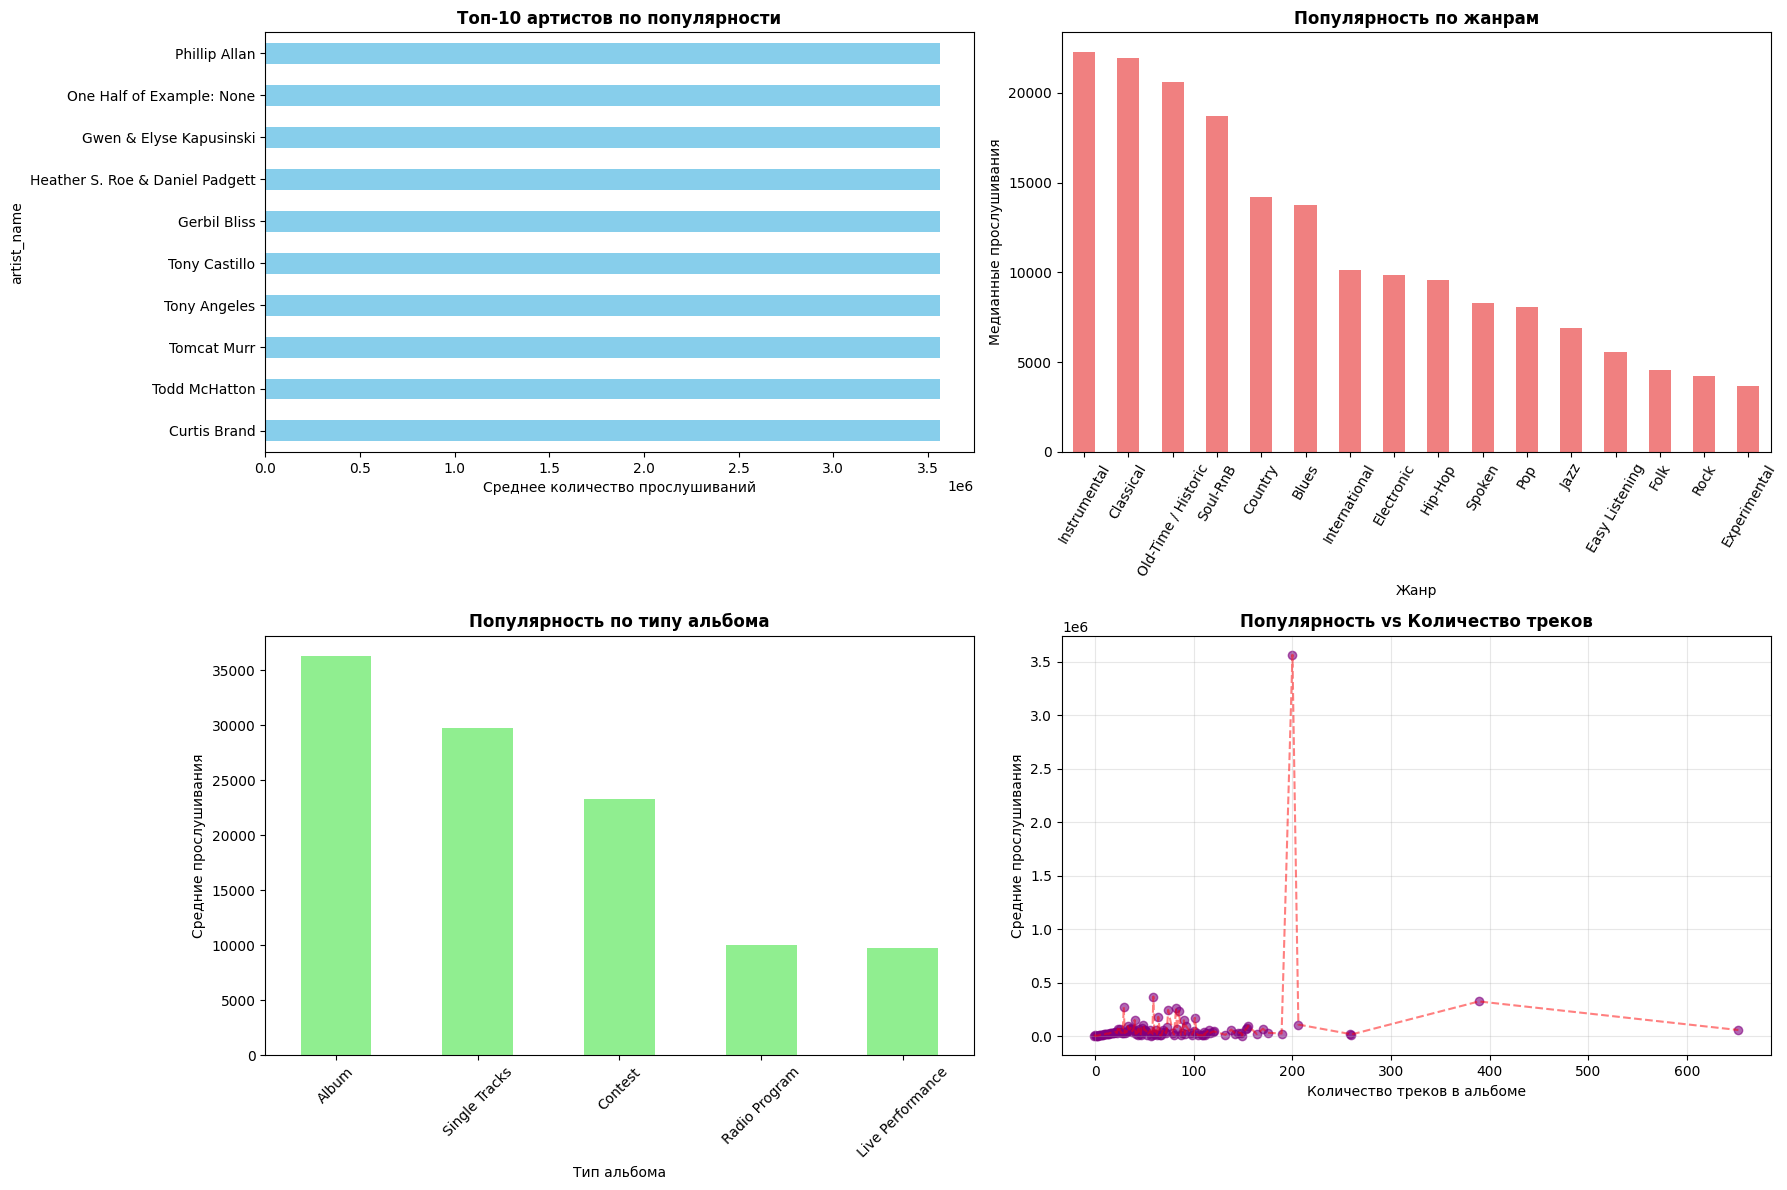

In [21]:
fig2, axes = plt.subplots(2, 2, figsize=(18, 12))

# Топ-10 артистов по средней популярности
ax1 = plt.subplot(2, 2, 1)
top_artists = df.groupby('artist_name')['album_listens'].mean().sort_values(ascending=False).head(10)
top_artists.plot(kind='barh', ax=ax1, color='skyblue')
plt.xlabel('Среднее количество прослушиваний')
plt.title('Топ-10 артистов по популярности', fontsize=12, fontweight='bold')
#plt.invert_yaxis()

# Популярность по жанрам
ax4 = plt.subplot(2, 2, 2)
genre_popularity = df.groupby('track_genre_top')['album_listens'].median().sort_values(ascending=False)
genre_popularity.plot(kind='bar', ax=ax4, color='lightcoral')
plt.xlabel('Жанр')
plt.ylabel('Медианные прослушивания')
plt.title('Популярность по жанрам', fontsize=12, fontweight='bold')
plt.tick_params(axis='x', rotation=60)

# Популярность по типам альбомов
ax5 = plt.subplot(2, 2, 3)
album_type_pop = df.groupby('album_type')['album_listens'].mean().sort_values(ascending=False)
album_type_pop.plot(kind='bar', ax=ax5, color='lightgreen')
plt.xlabel('Тип альбома')
plt.ylabel('Средние прослушивания')
plt.title('Популярность по типу альбома', fontsize=12, fontweight='bold')
plt.tick_params(axis='x', rotation=45)


# Популярность по количеству треков в альбоме
ax6 = plt.subplot(2, 2, 4)
track_count_pop = df.groupby('album_track_count')['album_listens'].mean()
plt.scatter(track_count_pop.index, track_count_pop.values, alpha=0.6, color='purple')
plt.plot(track_count_pop.index, track_count_pop.values, 'r--', alpha=0.5)
plt.xlabel('Количество треков в альбоме')
plt.ylabel('Средние прослушивания')
plt.title('Популярность vs Количество треков', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Первый график не информативный, поскольку среднее одинаковое у артистов.

По второму графику мы видим, что инструментальная и классическая музыка заметно превышет по прослушиваниям другие жанры. Это достаточно неожиданно, поскольку в основном люди слушают другой тип музки сейчас.

По третьему графику мы снова видим, что альбомы заметно превышают по количеству.

На последнем графике сразу заметны выбросы среди кол-ва треков в альбоме. Эти выбросы необходимо обработать.

## Корреляция числовых признаков с целевой переменной

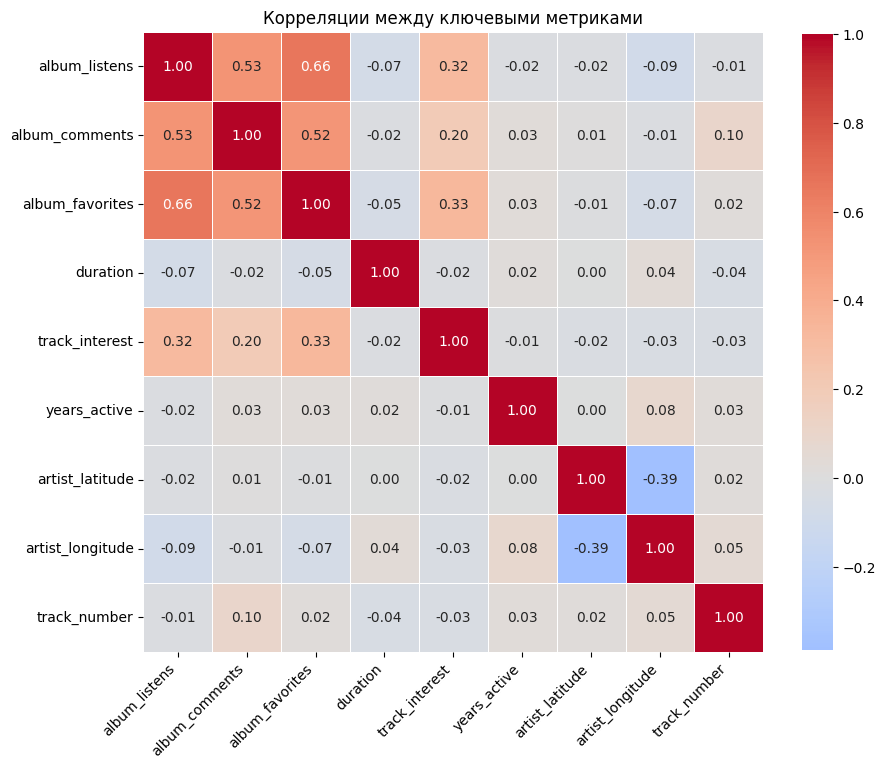

In [26]:
corr_columns = [ 'album_listens', 'album_comments', 'album_favorites', 'duration', 'track_interest', 'years_active', 'artist_latitude', 'artist_longitude', 'track_number']
corr_data = df[corr_columns].dropna()
corr_matrix = corr_data.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Корреляции между ключевыми метриками')
plt.xticks(rotation=45, ha='right')
plt.show()

По графику мы видим заметную корреляцию между кол-вом комментариев и кол-вом добавлений в избранное.

С целевой перемнной мы видим сильную корреляцию с кол-вом комметарий, добавлений в избранное и проявление интереса, что весьма логично, поскольку все эти параметры так или иначесвязаны с популярностью трека.

Из необычного, небольшая отрицательная корреляция наблюдается у кол-ва просулшиваний с длительностью трека.

## Географическое расположение артистов

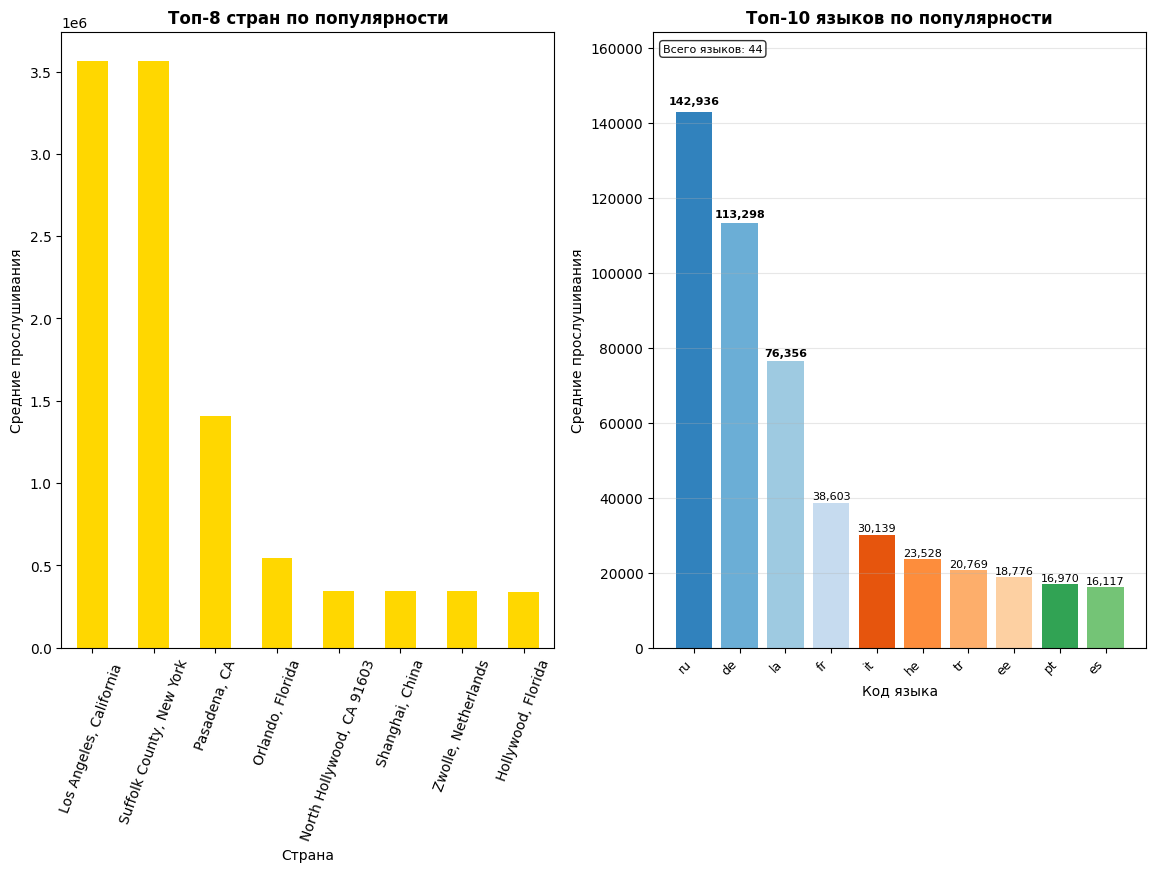

In [32]:
plt.figure(figsize=(14,8))

ax8 = plt.subplot(1, 2, 1)
country_pop = df.groupby('artist_location')['album_listens'].mean().sort_values(ascending=False).head(8)
country_pop.plot(kind='bar', ax=ax8, color='gold')
ax8.set_xlabel('Страна')
ax8.set_ylabel('Средние прослушивания')
ax8.set_title('Топ-8 стран по популярности', fontsize=12, fontweight='bold')
ax8.tick_params(axis='x', rotation=70)


ax9 = plt.subplot(1, 2, 2)

language_pop = df.groupby('language_code')['album_listens'].mean().sort_values(ascending=False)
top_languages = language_pop.head(10)

bars = ax9.bar(range(len(top_languages)), top_languages.values,
                color=plt.cm.tab20c(range(len(top_languages))))

ax9.set_xlabel('Код языка', fontsize=10)
ax9.set_ylabel('Средние прослушивания', fontsize=10)
ax9.set_title('Топ-10 языков по популярности', fontsize=12, fontweight='bold')

ax9.set_xticks(range(len(top_languages)))
ax9.set_xticklabels(top_languages.index, rotation=45, ha='right', fontsize=9)

for i, (bar, value) in enumerate(zip(bars, top_languages.values)):
    height = bar.get_height()
    ax9.text(bar.get_x() + bar.get_width()/2., height + (height * 0.01),
            f'{value:,.0f}', ha='center', va='bottom', fontsize=8,
            fontweight='bold' if i < 3 else 'normal')

ax9.grid(True, alpha=0.3, axis='y')

ax9.set_ylim([0, top_languages.max() * 1.15])

total_languages = df['language_code'].nunique()
ax9.annotate(f'Всего языков: {total_languages}',
            xy=(0.02, 0.98), xycoords='axes fraction',
            fontsize=8, ha='left', va='top',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))


plt.show()

Мы видим довольно сильный пик по  прослушиваниям в Лос-Анджелисе и Нью-Йорке, но при этом наиболее популярный язык для русских песен. Это необычно и непонятно с чем связано пока что.

## Анализ времени выпуска песен

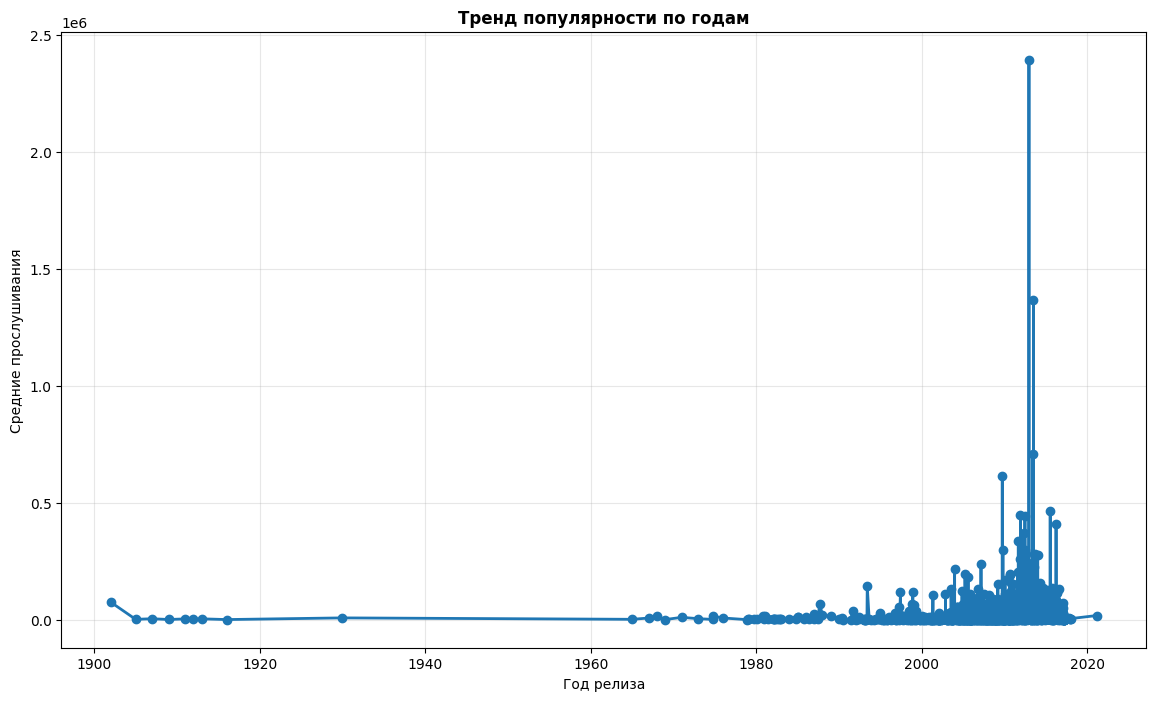

In [33]:
plt.figure(figsize=(14,8))

yearly_pop = df.groupby('album_release_date')['album_listens'].mean()
plt.plot(yearly_pop.index, yearly_pop.values, marker='o', linewidth=2)
plt.xlabel('Год релиза')
plt.ylabel('Средние прослушивания')
plt.title('Тренд популярности по годам', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.show()

Очень непонятно что происходит после 2000ых, рассмотрим их отдельно.

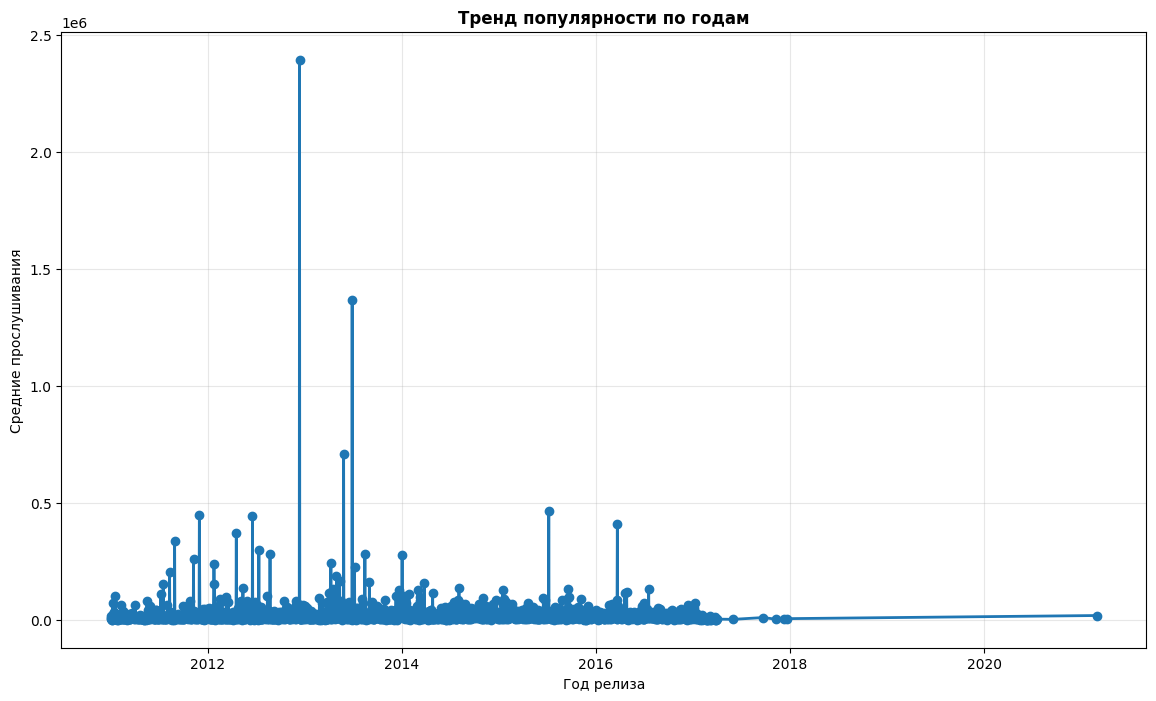

In [34]:
plt.figure(figsize=(14,8))
df_2 = df[df['album_release_year'] > 2010]
yearly_pop = df_2.groupby('album_release_date')['album_listens'].mean()
plt.plot(yearly_pop.index, yearly_pop.values, marker='o', linewidth=2)
plt.xlabel('Год релиза')
plt.ylabel('Средние прослушивания')
plt.title('Тренд популярности по годам', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

Из-за большого количества данных графики перестают быть информативными, но по ним видно, что было несколько заметных пиков по прослушиваю.

## Анализ сезонности

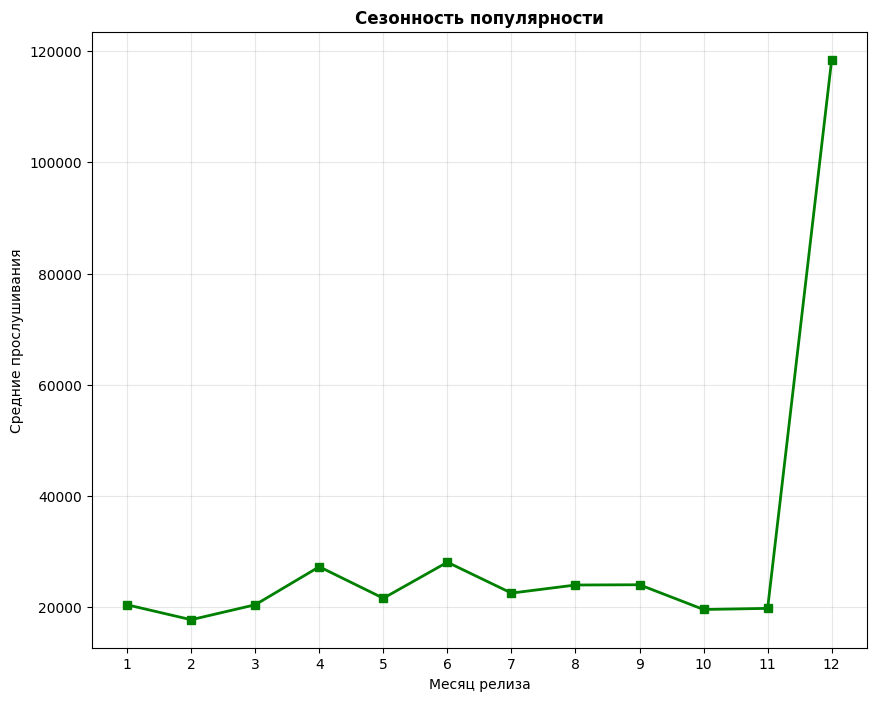

In [35]:
plt.figure(figsize=(10,8))
monthly_pop = df.groupby('album_release_month')['album_listens'].mean()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(monthly_pop.index, monthly_pop.values, marker='s', linewidth=2, color='green')
plt.xlabel('Месяц релиза')
plt.xticks(range(1, 13))
plt.ylabel('Средние прослушивания')
plt.title('Сезонность популярности', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.show()

Данный график показывет аномальный скачок в декабре, что может быть связано с тем, что в предверии нового года много праздничной музыки слушаю, а может быть связано с выбросами. Это мы происследуем в главе про выбросы.

## Анализ влияния продолжительности деятельности артиста

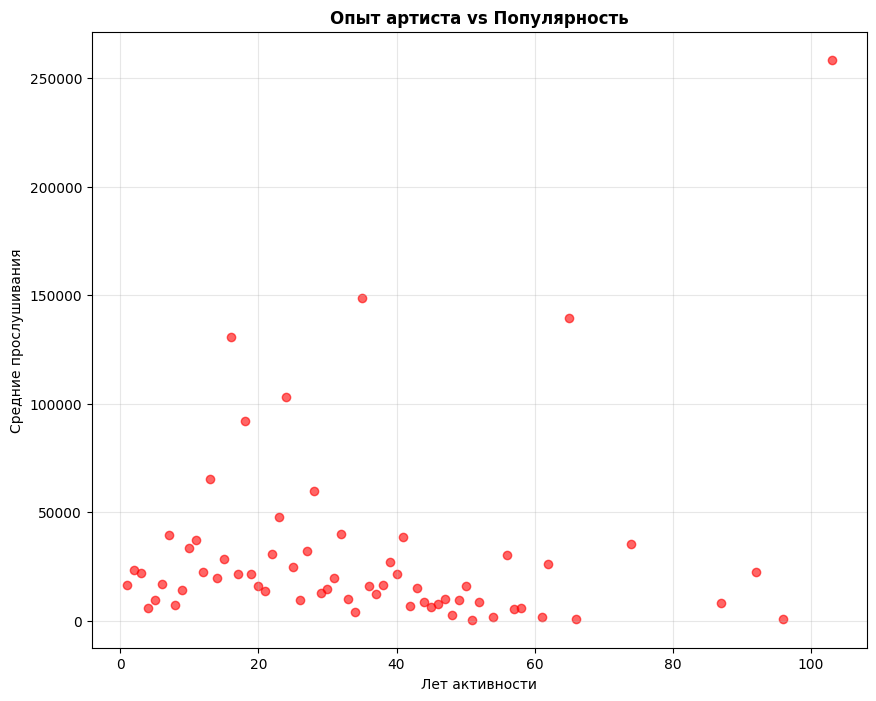

In [36]:
plt.figure(figsize=(10,8))
active_years_pop = df.groupby('years_active')['album_listens'].mean()
plt.scatter(active_years_pop.index, active_years_pop.values, alpha=0.6, color='red')
plt.xlabel('Лет активности')
plt.ylabel('Средние прослушивания')
plt.title('Опыт артиста vs Популярность', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

График показывает, что в целом от времени выпуска песен не зависит средние прослушивания. Это говорит, что слушатели выбирают музыку по звучанию, а не по "доверию" к долгоиграющим исполнителям.

## Анализ распределения длительности трека

/tmp/ipython-input-1757468947.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_pop = df.groupby(duration_bins)['album_listens'].mean()


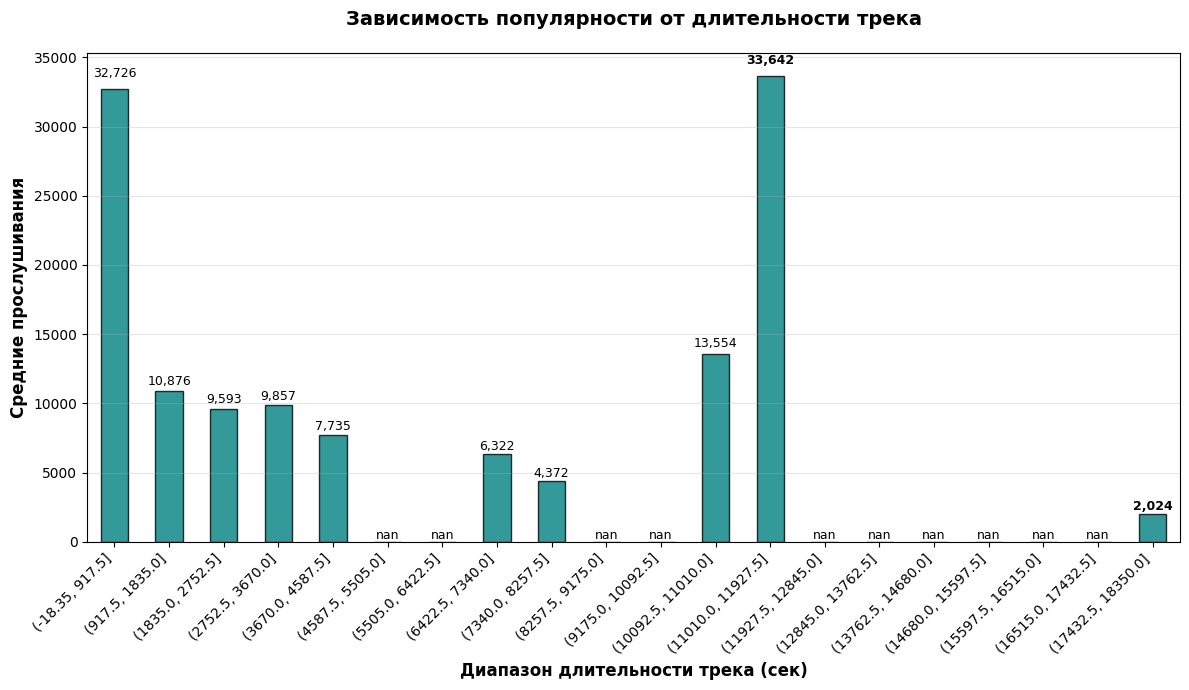

In [37]:
plt.figure(figsize=(12, 7))
duration_bins = pd.cut(df['duration'], bins=20)
duration_pop = df.groupby(duration_bins)['album_listens'].mean()

ax = duration_pop.plot(kind='bar', color='teal', edgecolor='black', alpha=0.8)

plt.xlabel('Диапазон длительности трека (сек)', fontsize=12, fontweight='bold')
plt.ylabel('Средние прослушивания', fontsize=12, fontweight='bold')
plt.title('Зависимость популярности от длительности трека', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')


for i, (bar, value) in enumerate(zip(ax.patches, duration_pop.values)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + (height * 0.02),
            f'{value:,.0f}', ha='center', va='bottom', fontsize=9,
            fontweight='bold' if i in [duration_pop.argmax(), duration_pop.argmin()] else 'normal')

plt.tight_layout()
plt.show()

По данному графику видны выбросы в очень больших длительностях треках, которые явно являются аномальными. Также интересным наблюдением является правым пик, который приходит примерно на 3 часа.

## Анализ выбросов